In [1]:
import pandas as pd

#### Reading the data

In [2]:
bank_data=pd.read_csv("bankchurn.csv")

In [3]:
bank_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f'{bank_data.shape[0]} samples and {bank_data.shape[1]} features in the insurance  dataset.')

10000 samples and 13 features in the insurance  dataset.


#### Understanding the data

#### view data types

In [5]:
bank_data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### view statistical information.


In [6]:
bank_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### information about data

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
bank_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

#### the Data mining tasks

#### missing data


In [9]:
total = bank_data.isnull().sum().sort_values(ascending=False)
percent = (bank_data.isnull().sum()/bank_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data.head(20)

,Total missing values,Percent
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0


#### checking for duplicate values


In [10]:
bank_data[bank_data.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#### Perform Exploratory Data Analysis (EDA)


In [11]:
# Get unique count for each variable
bank_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography             11
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
bank_data=bank_data.drop(['Surname'], axis = 1)

#### 1)spearating categorical and numerical columns


In [13]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous




In [14]:
categorical,continuous=separate_data_types(bank_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,"continuous":continuous},headers=["categorical","continuous"]))


categorical     continuous
--------------  ---------------
Gender          CustomerId
NumOfProducts   CreditScore
HasCrCard       Geography
IsActiveMember  Age
Exited          Tenure
                Balance
                EstimatedSalary


In [15]:
continuous.remove("Geography")
categorical.append("Geography")


In [16]:

print(tabulate({"categorical":categorical,"continuous":continuous},headers=["categorical","continuous"]))


categorical     continuous
--------------  ---------------
Gender          CustomerId
NumOfProducts   CreditScore
HasCrCard       Age
IsActiveMember  Tenure
Exited          Balance
Geography       EstimatedSalary


In [17]:
bank_data.shape

(10000, 12)

#### checking for  outliers

In [18]:
import numpy as np

In [19]:

print('row and columns before removing outliers:',bank_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]
    



row and columns before removing outliers: (10000, 12)
wait till shape after removing outlier is printed...


In [20]:
for i in continuous:
    print('i is',i)
    myOutliers(bank_data,i)
    print('***************************************************')

i is CustomerId
the lower range of CustomerId is 15441470.0
the upper range of CustomerId is 15940292.0
total outliers in CustomerId are 0
***************************************************
i is CreditScore
the lower range of CreditScore is 383.0
the upper range of CreditScore is 919.0
total outliers in CreditScore are 15
***************************************************
i is Age
the lower range of Age is 14.0
the upper range of Age is 62.0
total outliers in Age are 359
***************************************************
i is Tenure
the lower range of Tenure is -3.0
the upper range of Tenure is 13.0
total outliers in Tenure are 0
***************************************************
i is Balance
the lower range of Balance is -191466.36000000002
the upper range of Balance is 319110.60000000003
total outliers in Balance are 0
***************************************************
i is EstimatedSalary
the lower range of EstimatedSalary is -96577.09624999999
the upper range of EstimatedSalar

In [21]:
bank_data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

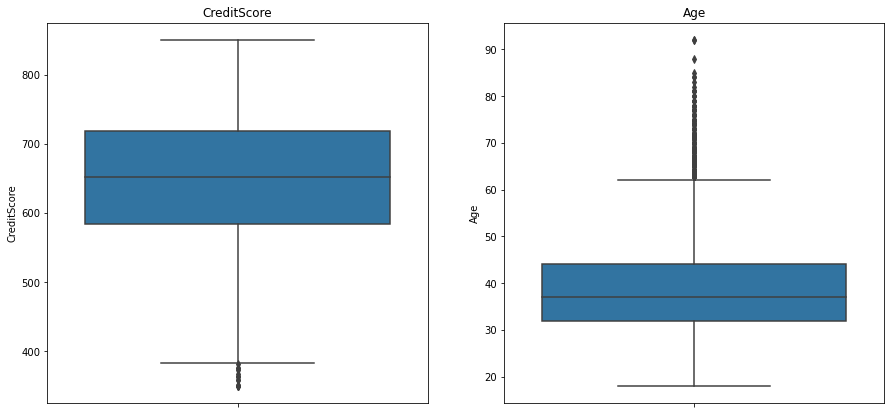

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=bank_data['CreditScore'],ax=ax[0]).set(title='CreditScore')
sns.boxplot(y=bank_data['Age'],ax=ax[1]).set(title='Age')
plt.show()

#### No need to remove outliers from this two feature because if we delete these records than we may loose important information about the customer to it is advisable not to delete this records.

#### EDA

### Univariate analysis 

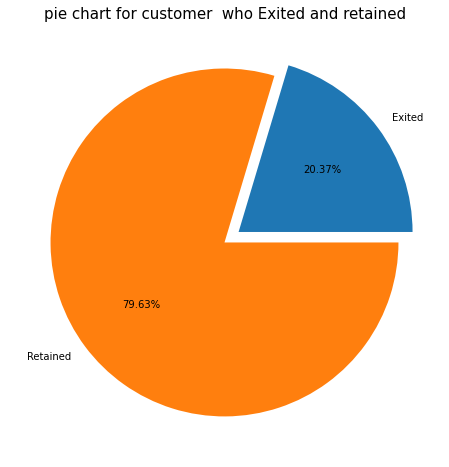

In [24]:
labels = 'Exited', 'Retained'
sizes = [bank_data.Exited[bank_data['Exited']==1].count(), bank_data.Exited[bank_data['Exited']==0].count()]
explode = (0.1,0.001)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%')
plt.title("pie chart for customer  who Exited and retained", size = 15)
plt.show()

## plotting for numerical columns

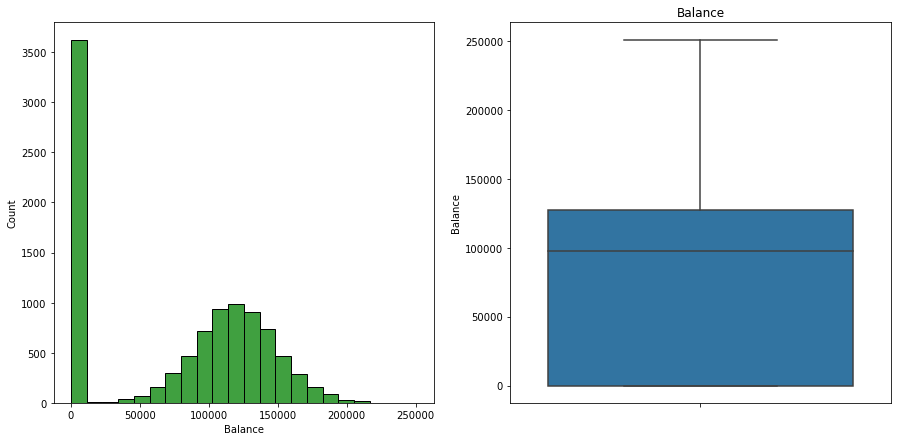

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=bank_data['Balance'],ax=ax[0],color='g')
sns.boxplot(y=bank_data['Balance'],ax=ax[1]).set(title='Balance')
plt.show()

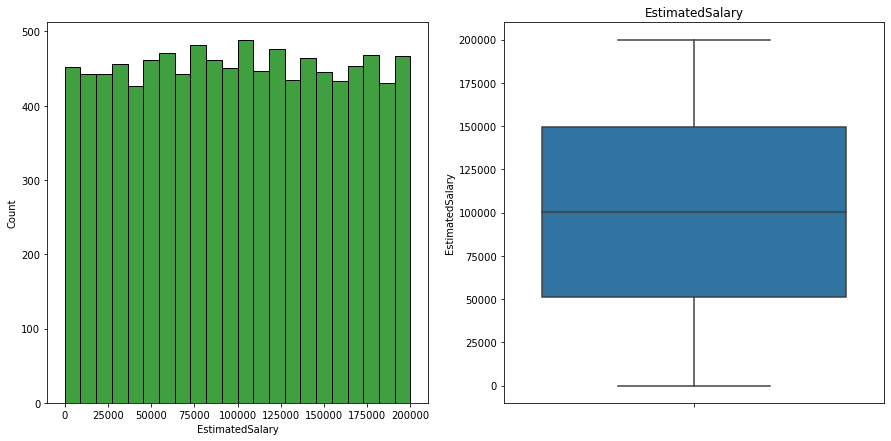

In [26]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=bank_data['EstimatedSalary'],ax=ax[0],color='g')
sns.boxplot(y=bank_data['EstimatedSalary'],ax=ax[1]).set(title='EstimatedSalary')
plt.show()

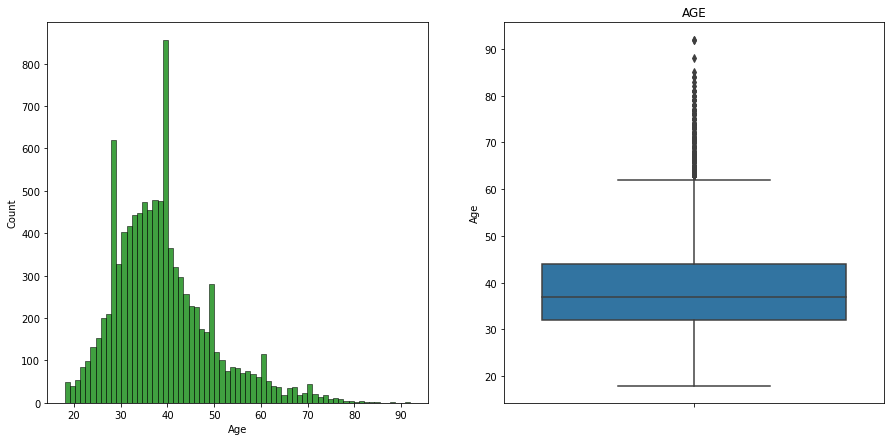

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=bank_data['Age'],ax=ax[0],color='g')
sns.boxplot(y=bank_data['Age'],ax=ax[1]).set(title='AGE')
plt.show()

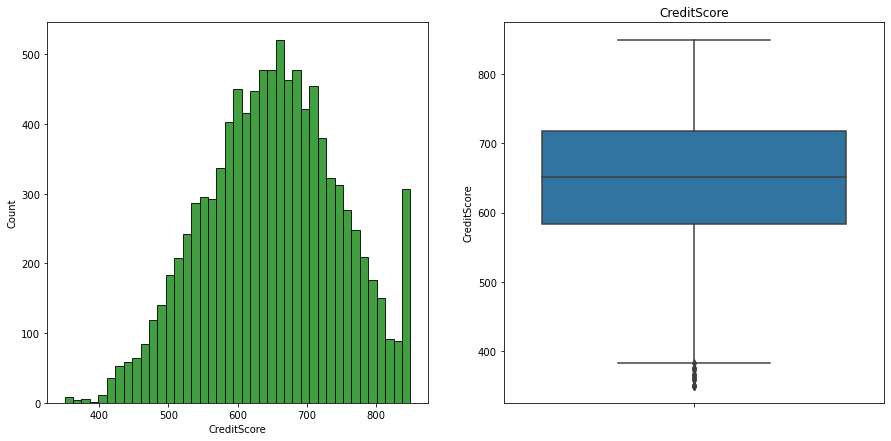

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=bank_data['CreditScore'],ax=ax[0],color='g')
sns.boxplot(y=bank_data['CreditScore'],ax=ax[1]).set(title='CreditScore')
plt.show()

### bivariate

In [29]:
categorical

['Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Geography']

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

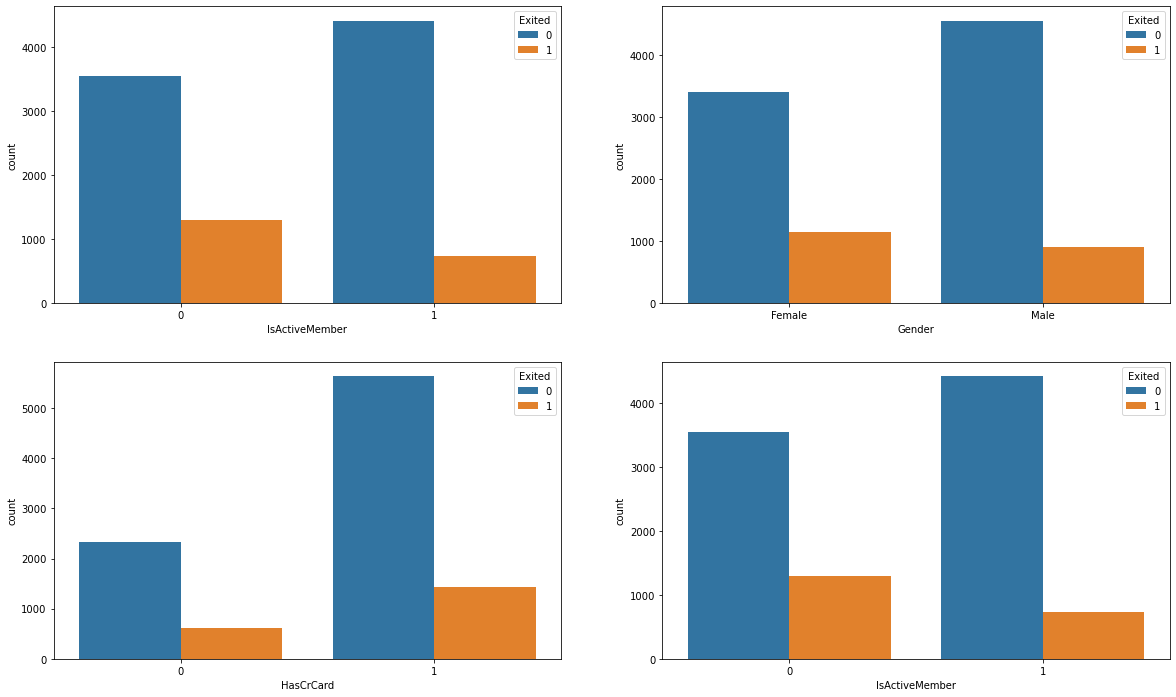

In [30]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_data, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = bank_data, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = bank_data, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_data,ax=axarr[1][1])
    

#### female customers churning is also greater than that of male customers

#### majority of the customers that churned are those with credit cards

#### large crowd who is churning is not active member

#### droping incorrectly filled rows 

In [31]:
wrong_words=['espanio','fra','ger','gernamy','france','spain','germany','GERMANY']

In [32]:

for i in wrong_words:
    L_1=[]
    L_1=bank_data.index[bank_data['Geography']==i].tolist()
    print(L_1)
    bank_data = bank_data.drop(index=L_1)

[5, 251, 1416, 1948, 2590, 4515]
[6, 154, 600, 1089, 1372, 3611]
[159, 390, 6399, 9255]
[1027]
[71, 128, 324, 684, 782, 905, 3727]
[407, 4319]
[792]
[9499]


In [33]:
bank_data.shape

(9972, 12)

<AxesSubplot:xlabel='Geography', ylabel='count'>

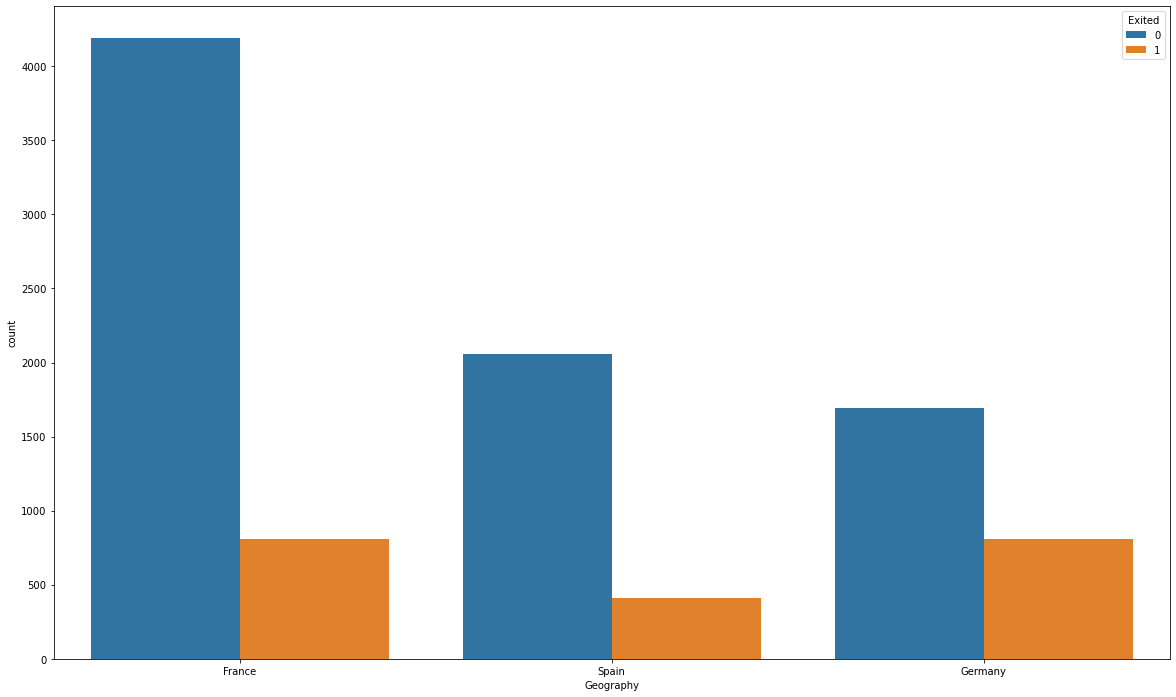

In [34]:
fig, axarr = plt.subplots(figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = bank_data)

#### interpretation:majority of populations are leaving from France and germany


### Multivariate

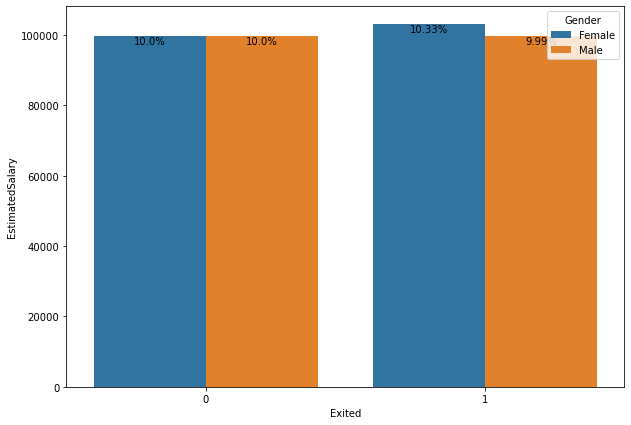

In [35]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=bank_data['Exited'],y=bank_data['EstimatedSalary'],hue=bank_data['Gender'],ci=None,ax=ax)
count=len(bank_data['Exited'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()


### Data quality  | Detect correlations

In [36]:
column_correlation = bank_data.corr()
column_correlation

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.006043,0.010323,-0.014559,-0.013717,0.018265,-0.013469,0.001041,0.014960,-0.005947
CreditScore,0.006043,1.000000,-0.003637,0.000529,0.005715,0.012424,-0.006630,0.025923,-0.001396,-0.027389
Age,0.010323,-0.003637,1.000000,-0.009640,0.029055,-0.031260,-0.011941,0.085415,-0.006287,0.285303
Tenure,-0.014559,0.000529,-0.009640,1.000000,-0.012448,0.013754,0.022907,-0.028441,0.006957,-0.014735
Balance,-0.013717,0.005715,0.029055,-0.012448,1.000000,-0.303955,-0.014636,-0.010449,0.012770,0.118366
NumOfProducts,0.018265,0.012424,-0.031260,0.013754,-0.303955,1.000000,0.003085,0.010201,0.014626,-0.048752
HasCrCard,-0.013469,-0.006630,-0.011941,0.022907,-0.014636,0.003085,1.000000,-0.011374,-0.009633,-0.007115
IsActiveMember,0.001041,0.025923,0.085415,-0.028441,-0.010449,0.010201,-0.011374,1.000000,-0.011619,-0.156969
EstimatedSalary,0.014960,-0.001396,-0.006287,0.006957,0.012770,0.014626,-0.009633,-0.011619,1.000000,0.012326
Exited,-0.005947,-0.027389,0.285303,-0.014735,0.118366,-0.048752,-0.007115,-0.156969,0.012326,1.000000


<AxesSubplot:>

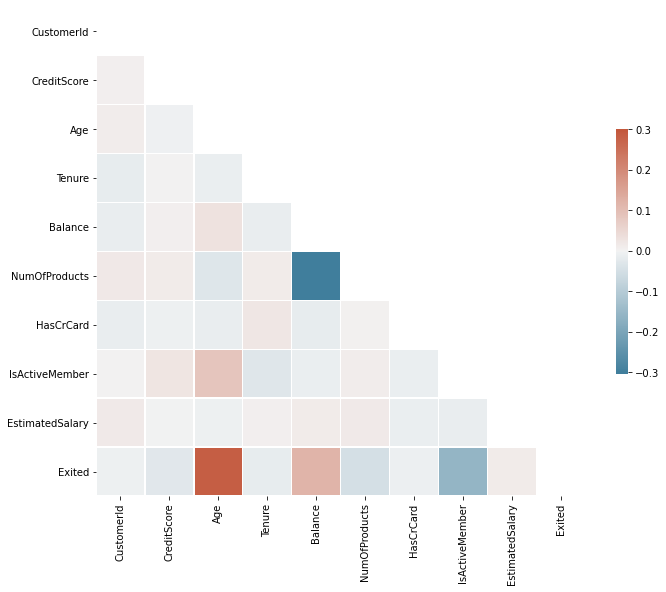

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = bank_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
def corr_col(dependent): 
    #saleprice correlation matrix
    k = len(corr.columns)
    cols = corr.nlargest(k, dependent)[dependent].index
    cm = np.corrcoef(bank_data[cols].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(9, 9))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    d=zip(cm[0],cols)
    l_1=[]
    for _ in d:
        l_1.append(_)
    return(pd.DataFrame(l_1,columns=['Corr_value','Col_name']))

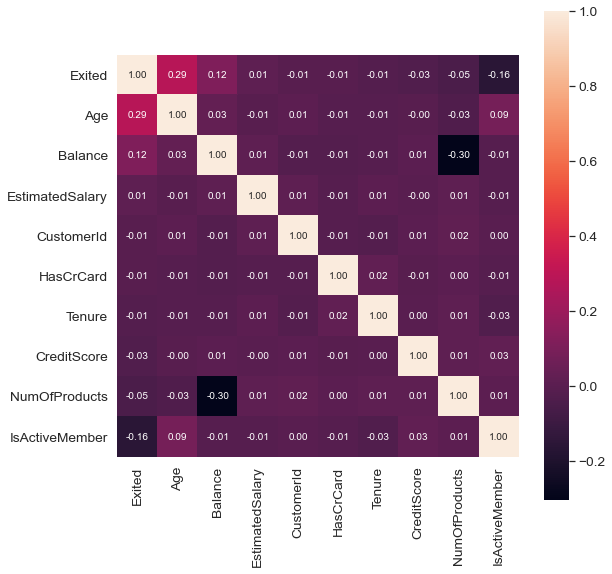

,Corr_value,Col_name
0,1.000000,Exited
1,0.285303,Age
2,0.118366,Balance
3,0.012326,EstimatedSalary
4,-0.005947,CustomerId
5,-0.007115,HasCrCard
6,-0.014735,Tenure
7,-0.027389,CreditScore
8,-0.048752,NumOfProducts
9,-0.156969,IsActiveMember


In [39]:
corr_col('Exited')#name of dependent variable


In [40]:
bank_data.shape

(9972, 12)

In [41]:
#One Hot encoding
bank_data = pd.get_dummies(bank_data, columns =["Geography", "Gender"], drop_first = False)

In [42]:
bank_data.head().columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [43]:
bank_data

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [44]:
bank_data.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ['CreditScore', 'Age', 'Tenure', 'Balance',
        'NumOfProducts',  'EstimatedSalary']
bank_data[scale_columns] = std_scaler.fit_transform(bank_data[scale_columns])

bank_data.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.325524,0.292649,-1.040605,-1.226460,-0.911397,1,1,0.022144,1,1,0,0,1,0
1,15647311,-0.439386,0.197333,-1.386330,0.117154,-0.911397,0,1,0.216743,0,0,0,1,1,0
2,15619304,-1.536606,0.292649,1.033741,1.333234,2.529894,1,0,0.240890,1,1,0,0,1,0
3,15701354,0.502566,0.006700,-1.386330,-1.226460,0.809248,0,0,-0.108628,0,1,0,0,1,0
4,15737888,2.065587,0.387965,-1.040605,0.785739,-0.911397,1,1,-0.364921,0,0,0,1,1,0


In [46]:
# from sklearn.preprocessing import MinMaxScaler
# MinMax_scaler = MinMaxScaler()

# scale_columns = ['CreditScore', 'Age', 'Tenure', 'Balance',
#        'NumOfProducts',  'EstimatedSalary']
# bank_data[scale_columns] = MinMax_scaler.fit_transform(bank_data[scale_columns])

# bank_data.head()

In [47]:
y=bank_data['Exited']

x=bank_data.drop('Exited', axis=1)

In [48]:
x = x.drop(['CustomerId'],axis = 1)

In [49]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.325524,0.292649,-1.040605,-1.226460,-0.911397,1,1,0.022144,1,0,0,1,0
1,-0.439386,0.197333,-1.386330,0.117154,-0.911397,0,1,0.216743,0,0,1,1,0
2,-1.536606,0.292649,1.033741,1.333234,2.529894,1,0,0.240890,1,0,0,1,0
3,0.502566,0.006700,-1.386330,-1.226460,0.809248,0,0,-0.108628,1,0,0,1,0
4,2.065587,0.387965,-1.040605,0.785739,-0.911397,1,1,-0.364921,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.247848,0.006700,-0.003432,-1.226460,0.809248,1,0,-0.066139,1,0,0,0,1
9996,-1.391690,-0.374564,1.725189,-0.306706,-0.911397,1,1,0.028244,1,0,0,0,1
9997,0.606078,-0.279248,0.688016,-1.226460,-0.911397,0,1,-1.008127,1,0,0,1,0
9998,1.258199,0.292649,-0.694881,-0.022847,0.809248,1,0,-0.124936,0,1,0,0,1


In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9972, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0) 
                                                   

## Build the Model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [54]:
## User defined function for accuracy report

def confusionMatrix(df):
    #accuracy score
    print("Accuracy Score = {}".format(accuracy_score(df.actual,df.predicted)))
    print("\n")
    #Confusion Matrix
    print("Confusion Matrix")
    print(pd.crosstab(df.actual,df.predicted,margins=True))
    print("\n")
    #Classification Report
    print("Calssification Report\n",classification_report(df.actual, df.predicted))
    
    # ROC /AUC
    fpr,tpr,_=metrics.roc_curve(df.actual,df.predicted)
    area_under_curve=metrics.auc(fpr,tpr)
    
    #plot the ROC
    
    plt.title("Receptive Characterstic Curve")
    plt.plot(fpr,tpr,'b',label="AUC="+str(area_under_curve))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') #dummy model
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()

In [55]:
models = []
models.append(('LR', LogisticRegression(random_state = 3)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier(random_state = 3)))
models.append(('RF',RandomForestClassifier(random_state = 3)))
models.append(('SVM',SVC(gamma = 'auto',random_state = 3)))

# evaluate each model in turn
results = []
names = []

LR: (0.810526)
Accuracy Score = 0.8105263157894737


Confusion Matrix
predicted     0    1   All
actual                    
0          1534   59  1593
1           319   83   402
All        1853  142  1995


Calssification Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.21      0.31       402

    accuracy                           0.81      1995
   macro avg       0.71      0.58      0.60      1995
weighted avg       0.78      0.81      0.77      1995



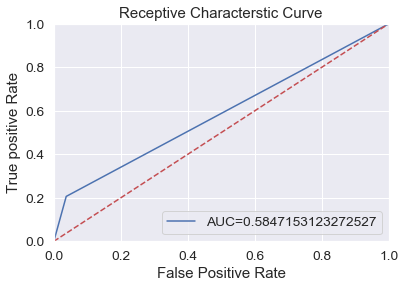

None
    prediction  Exited
11           0       0
17           0       0
20           0       0
25           0       0
33           0       0
 
****************************************************************************************************
****************************************************************************************************
 
KNN: (0.836591)
Accuracy Score = 0.8365914786967419


Confusion Matrix
predicted     0    1   All
actual                    
0          1500   93  1593
1           233  169   402
All        1733  262  1995


Calssification Report
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.65      0.42      0.51       402

    accuracy                           0.84      1995
   macro avg       0.76      0.68      0.71      1995
weighted avg       0.82      0.84      0.82      1995



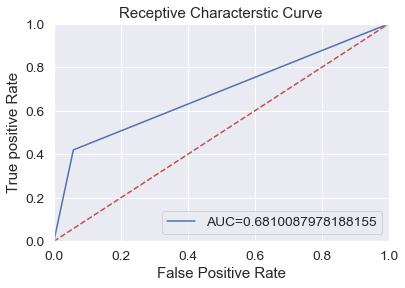

None
    prediction  Exited
11           0       0
17           0       0
20           0       0
25           0       0
33           0       0
 
****************************************************************************************************
****************************************************************************************************
 
CART: (0.792982)
Accuracy Score = 0.7929824561403509


Confusion Matrix
predicted     0    1   All
actual                    
0          1385  208  1593
1           205  197   402
All        1590  405  1995


Calssification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.49      0.49      0.49       402

    accuracy                           0.79      1995
   macro avg       0.68      0.68      0.68      1995
weighted avg       0.79      0.79      0.79      1995



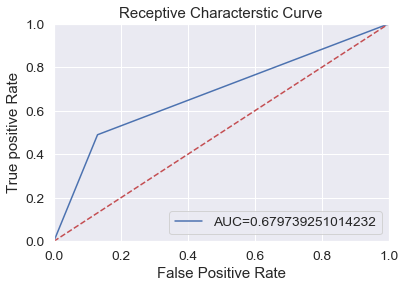

None
    prediction  Exited
11           0       0
17           0       0
20           0       0
25           0       0
33           0       0
 
****************************************************************************************************
****************************************************************************************************
 
RF: (0.862155)
Accuracy Score = 0.8621553884711779


Confusion Matrix
predicted     0    1   All
actual                    
0          1530   63  1593
1           212  190   402
All        1742  253  1995


Calssification Report
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.47      0.58       402

    accuracy                           0.86      1995
   macro avg       0.81      0.72      0.75      1995
weighted avg       0.85      0.86      0.85      1995



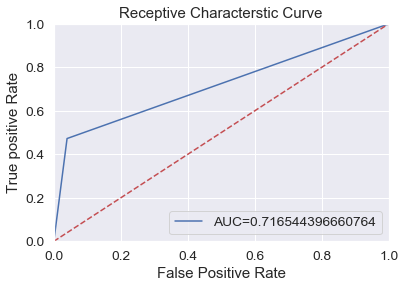

None
    prediction  Exited
11           0       0
17           0       0
20           0       0
25           0       0
33           0       0
 
****************************************************************************************************
****************************************************************************************************
 
SVM: (0.861654)
Accuracy Score = 0.8616541353383459


Confusion Matrix
predicted     0    1   All
actual                    
0          1561   32  1593
1           244  158   402
All        1805  190  1995


Calssification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.83      0.39      0.53       402

    accuracy                           0.86      1995
   macro avg       0.85      0.69      0.73      1995
weighted avg       0.86      0.86      0.84      1995



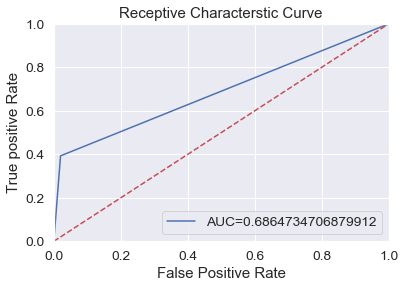

None
    prediction  Exited
11           0       0
17           0       0
20           0       0
25           0       0
33           0       0
 
****************************************************************************************************
****************************************************************************************************
 


In [64]:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    msg = '%s: (%f)'% (name,accuracy)
    print(msg)
    df=pd.DataFrame({'actual':y_test,'predicted':y_pred.flatten(),'True/false':y_test==y_pred})
    print(confusionMatrix(df))
    series_pred = pd.Series(y_pred)


    df1 = pd.DataFrame(data=series_pred, columns=['prediction'])
    df = pd.merge(df1, y_test, left_index=True, right_index=True)
    print(df.head())
    print(" ")
    print(100*"*")
    print(100*"*")
    print(" ")

## Cross Validation

C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


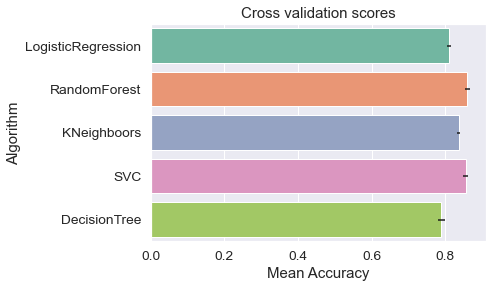

In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)
# Modeling step Test differents algorithms 
random_state = 10101
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForest","KNeighboors","SVC","DecisionTree"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [58]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.809953,0.006350,LogisticRegression
1,0.859721,0.006681,RandomForest
2,0.836279,0.003832,KNeighboors
3,0.855584,0.006608,SVC
4,0.789772,0.009215,DecisionTree


##### Best Algorithm is  random forest  because it gives best results compare to others classificaton algorithms